In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text
import seaborn as sns


In [31]:
!pip install adjustText

In [2]:
df= pd.read_csv("Financials.csv")
df.head()
df.info()
df.shape
df.describe()#how many NaN?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

,Month Number,Year
count,700.000000,700.000000
mean,7.900000,2013.750000
std,3.377321,0.433322
min,1.000000,2013.000000
25%,5.750000,2013.750000
50%,9.000000,2014.000000
75%,10.250000,2014.000000
max,12.000000,2014.000000


In [3]:
print(df.columns)

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')


In [4]:
df.columns = df.columns.str.strip()

In [5]:
#clean all coumn names for easier access
def clean_currency_columns(df):
    # Identify columns that contain currency formatting
    currency_cols = [
        col for col in df.columns
        if df[col].astype(str).str.contains(r'[\$,]', regex=True).any()
    ]
    
    for col in currency_cols:
        df[col] = (
            df[col]
              .astype(str)  # handle mixed types
              .str.replace(r'[^\d\.\-]', '', regex=True)  # keep only digits, dot, dash [anything except . - and int should go]
              .str.strip()
              .replace('-', None)  # treat lone dash as missing
        )
        df[col] = pd.to_numeric(df[col], errors='coerce')  # force floats
    
    return df

# Cleaning the data
df = clean_currency_columns(df)



In [6]:
df[['Units Sold']].head(10)


,Units Sold
0,1618.5
1,1321.0
2,2178.0
3,888.0
4,2470.0
5,1513.0
6,921.0
7,2518.0
8,1899.0
9,1545.0


In [7]:
df.head()


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,01/06/2014,6,June,2014


In [8]:
df['Calculated Units Sold'] = df['COGS'] / df['Units Sold'] #realized units sold was mislabeled! stored as $ and 1/10 th of COGS 
df['Calculated Units Sold'] 
df.rename(columns={'Units Sold': 'Unit Cost'}, inplace=True)


In [9]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Segment                700 non-null    object 
 1   Country                700 non-null    object 
 2   Product                700 non-null    object 
 3   Discount Band          700 non-null    object 
 4   Unit Cost              700 non-null    float64
 5   Manufacturing Price    700 non-null    float64
 6   Sale Price             700 non-null    float64
 7   Gross Sales            700 non-null    float64
 8   Discounts              647 non-null    float64
 9   Sales                  700 non-null    float64
 10  COGS                   700 non-null    float64
 11  Profit                 695 non-null    float64
 12  Date                   700 non-null    object 
 13  Month Number           700 non-null    int64  
 14  Month Name             700 non-null    object 
 15  Year  

In [10]:
df['Calculated Units Sold'].describe()
#most transactions for <10 units => big transactions skew

count    700.000000
mean      94.000000
std      108.890884
min        3.000000
25%        5.000000
50%       10.000000
75%      250.000000
max      260.000000
Name: Calculated Units Sold, dtype: float64

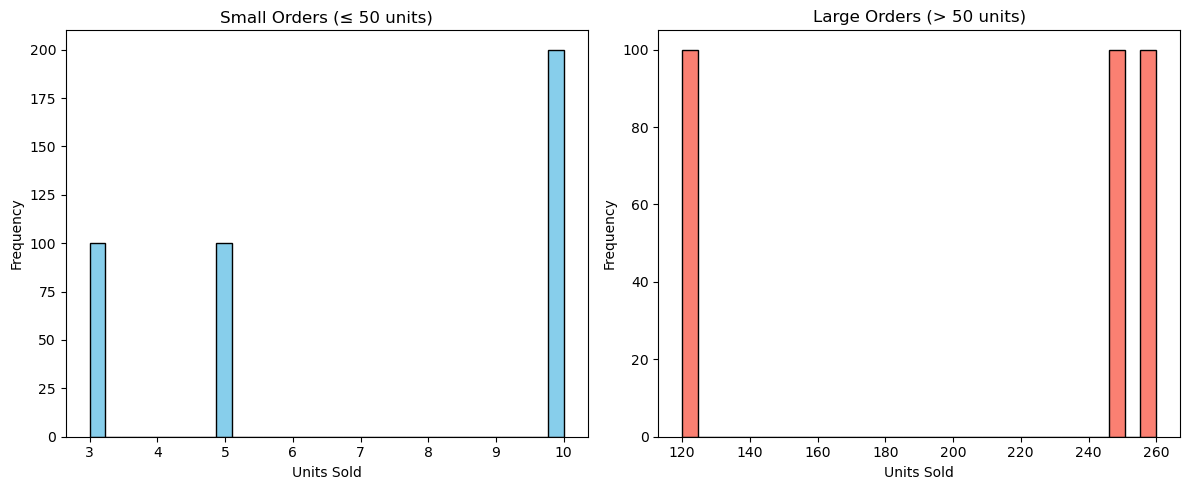

In [11]:
#visual plot for skew

# Create two datasets
small_orders = df[df['Calculated Units Sold'] <= 50]['Calculated Units Sold']
large_orders = df[df['Calculated Units Sold'] > 50]['Calculated Units Sold']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Small orders
axes[0].hist(small_orders, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Small Orders (≤ 50 units)')
axes[0].set_xlabel('Units Sold')
axes[0].set_ylabel('Frequency')

# Large orders
axes[1].hist(large_orders, bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Large Orders (> 50 units)')
axes[1].set_xlabel('Units Sold')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



In [12]:
#Univariate analysis of Profit
df['Profit'].describe()

count       695.000000
mean      26544.380993
std       41515.104658
min         285.600000
25%        4013.630000
50%       11135.600000
75%       23918.500000
max      262200.000000
Name: Profit, dtype: float64

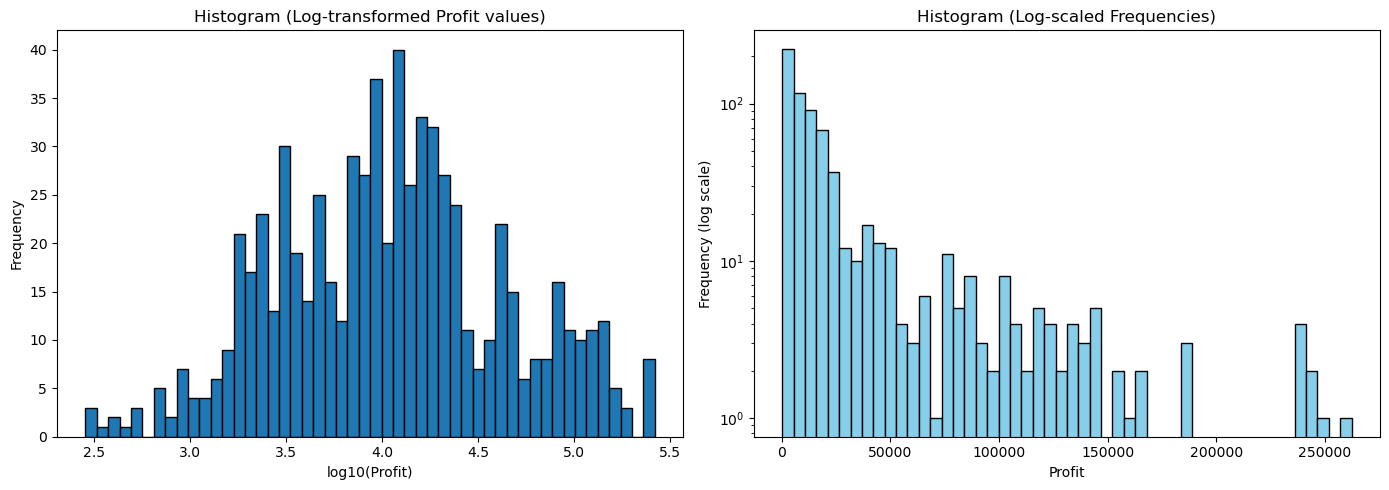

In [14]:
#profits
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Log-transform on X-axis (profit values)
axes[0].hist(np.log10(profit_data), bins=50, edgecolor='black')
axes[0].set_xlabel("log10(Profit)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram (Log-transformed Profit values)")

# 2. Log-scale on Y-axis (counts)
axes[1].hist(profit_data, bins=50, color='skyblue',edgecolor='black', log=True)
axes[1].set_xlabel("Profit")
axes[1].set_ylabel("Frequency (log scale)")
axes[1].set_title("Histogram (Log-scaled Frequencies)")

plt.tight_layout()
plt.show()

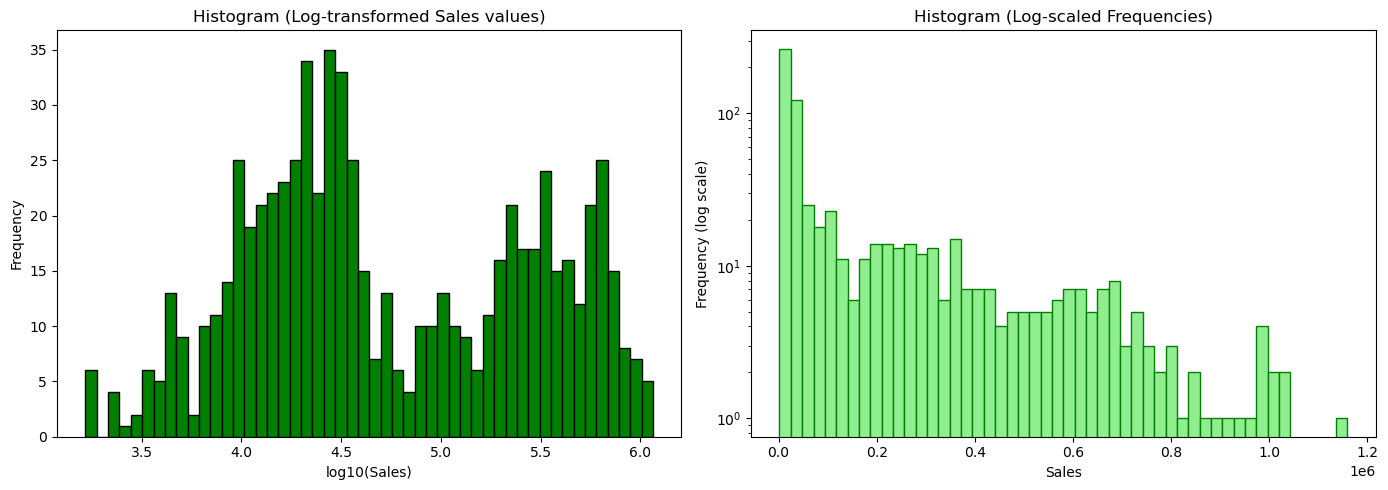

In [15]:
#sales
sales_data= df['Sales']
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Log-transform on X-axis (sales values)
axes[0].hist(np.log10(sales_data), bins=50, color='green',edgecolor='black')
axes[0].set_xlabel("log10(Sales)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram (Log-transformed Sales values)")

# 2. Log-scale on Y-axis (fequencies)
axes[1].hist(sales_data, bins=50, color='lightgreen',edgecolor='green', log=True)
axes[1].set_xlabel("Sales")
axes[1].set_ylabel("Frequency (log scale)")
axes[1].set_title("Histogram (Log-scaled Frequencies)")

plt.tight_layout()
plt.show()

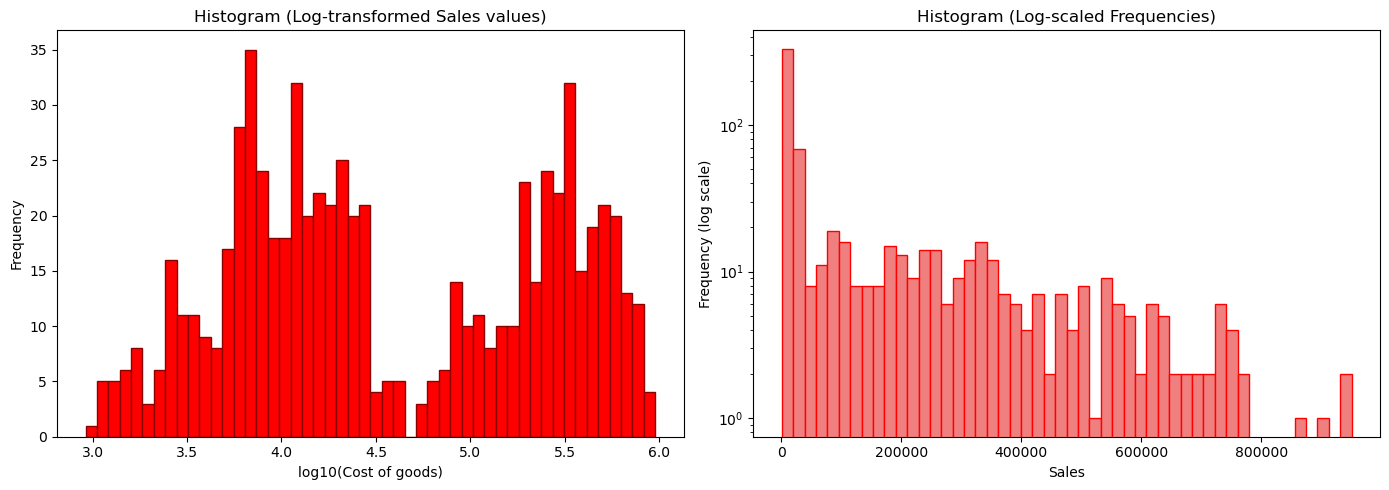

In [16]:
#COGS- cost of goods sold
cogs_data= df['COGS']
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Log-transform on X-axis (sales values)
axes[0].hist(np.log10(cogs_data), bins=50, color='red',edgecolor='darkred')
axes[0].set_xlabel("log10(Cost of goods)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram (Log-transformed Sales values)")

# 2. Log-scale on Y-axis (fequencies)
axes[1].hist(cogs_data, bins=50, color='lightcoral',edgecolor='red', log=True)
axes[1].set_xlabel("Sales")
axes[1].set_ylabel("Frequency (log scale)")
axes[1].set_title("Histogram (Log-scaled Frequencies)")

plt.tight_layout()
plt.show()

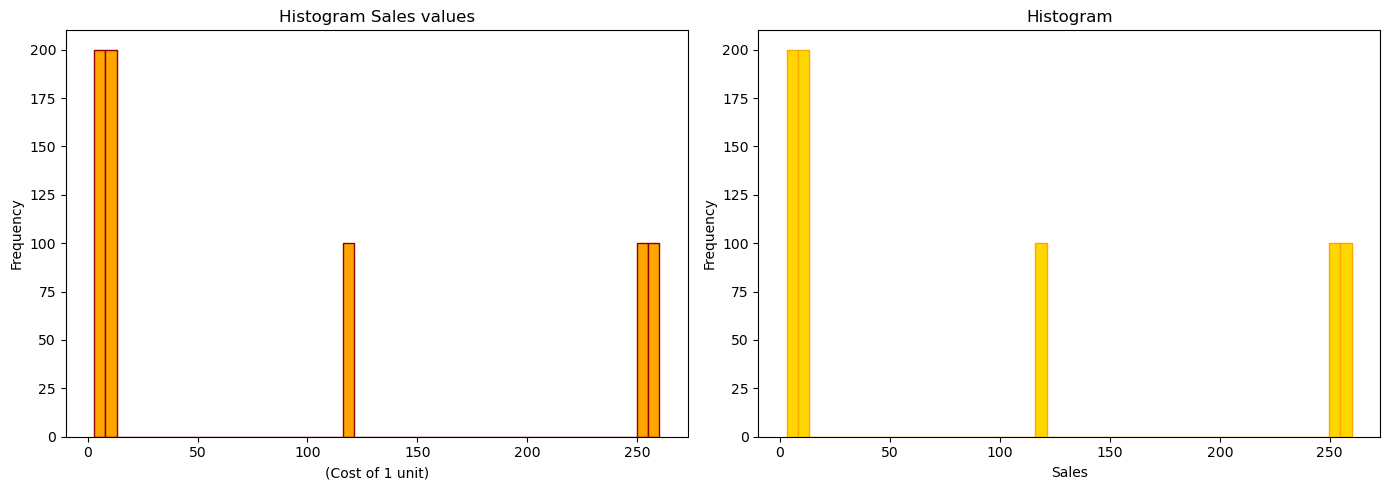

In [17]:
#Calculated Units Sold
cus_data= df['Calculated Units Sold']
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Log-transform on X-axis (sales values)
axes[0].hist((cus_data), bins=50, color='orange',edgecolor='darkred')
axes[0].set_xlabel("(Cost of 1 unit)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram Sales values")

# 2. Log-scale on Y-axis (fequencies)
axes[1].hist(cus_data, bins=50, color='gold',edgecolor='orange')
axes[1].set_xlabel("Sales")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram")

plt.tight_layout()
plt.show()

In [18]:
def count_object_columns(df):
    # Identify columns that contain currency formatting
    currency_cols = [
        col for col in df.columns
        if df[col].astype(str).str.contains(r'[\$,]', regex=True).any()
    ]
    
    for col in currency_cols:
        df[col] = (
            df[col]
              .astype(str)  # handle mixed types
              .str.replace(r'[^\d\.\-]', '', regex=True)  # keep only digits, dot, dash [anything except . - and int should go]
              .str.strip()
              .replace('-', None)  # treat lone dash as missing
        )
        df[col] = pd.to_numeric(df[col], errors='coerce')  # force floats
    
    return df

df = clean_currency_columns(df)


<BarContainer object of 5 artists>

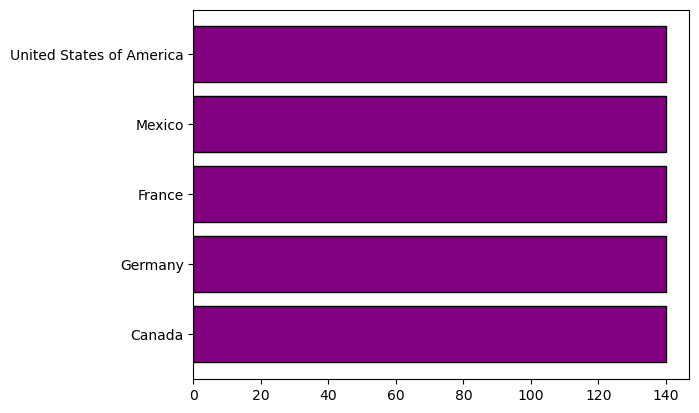

In [19]:
#Country
country_data= df['Country']
number= df['Country'].value_counts()
plt.barh(number.index, number.values, edgecolor='black', color='purple')

<BarContainer object of 5 artists>

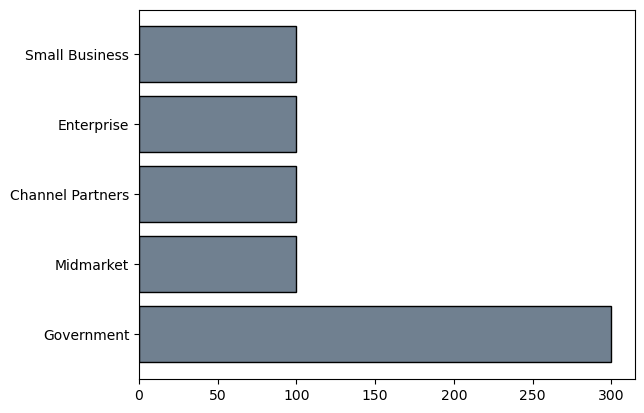

In [20]:
#Segment
country_data= df['Segment']
number= df['Segment'].value_counts()
plt.barh(number.index, number.values, edgecolor='black', color='slategrey')

<BarContainer object of 6 artists>

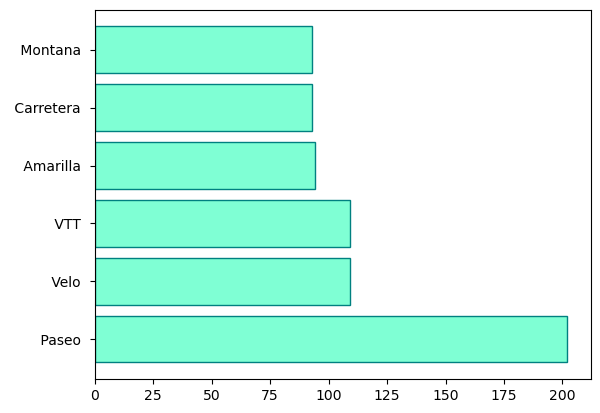

In [21]:
#Product
country_data= df['Product']
number= df['Product'].value_counts()
plt.barh(number.index, number.values, edgecolor='teal', color='aquamarine')

<BarContainer object of 4 artists>

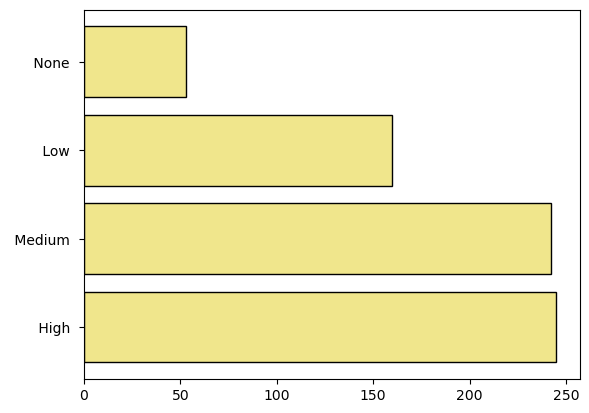

In [22]:
#Discount Band
country_data= df['Discount Band']
number= df['Discount Band'].value_counts()
plt.barh(number.index, number.values, edgecolor='black', color='khaki')

<BarContainer object of 5 artists>

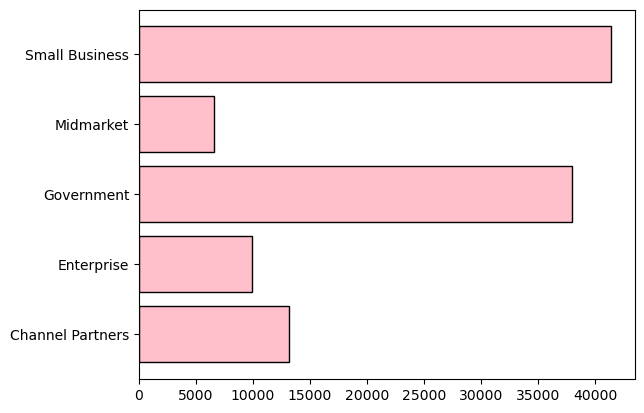

In [23]:
#Explore relationships between categorical and numerical variables
segment_profit=df.groupby('Segment')['Profit'].mean()
plt.barh(segment_profit.index, segment_profit.values, edgecolor='black', color='pink')

<BarContainer object of 5 artists>

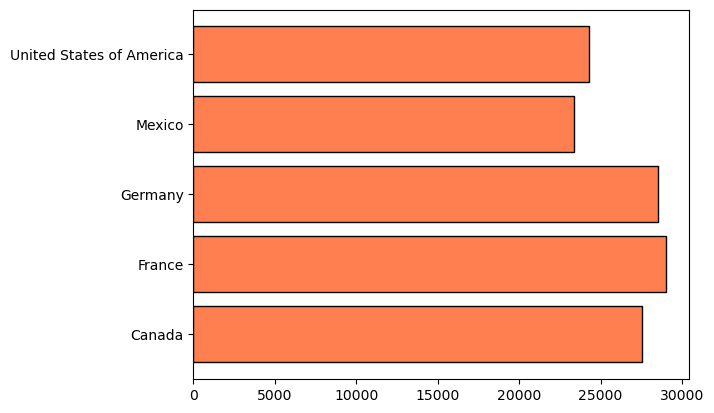

In [24]:
country_profit=df.groupby('Country')['Profit'].mean()
plt.barh(country_profit.index, country_profit.values, edgecolor='black', color='coral')

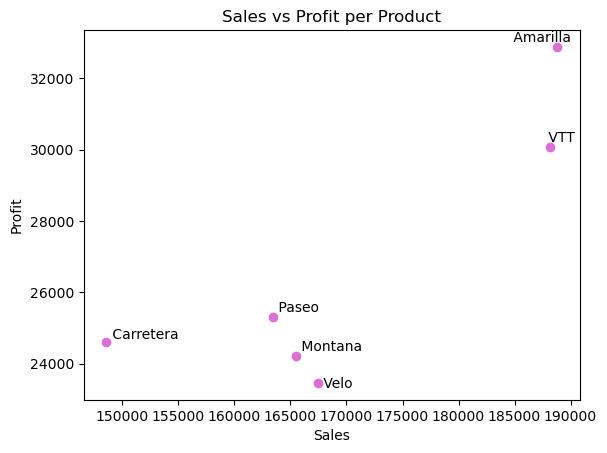

In [37]:
# scatter plot
plt.scatter(product_stats['Sales'], product_stats['Profit'], color="orchid")

# store all text objects in a list
texts = []
for x, y, product in zip(product_stats['Sales'], product_stats['Profit'], product_stats.index):
    texts.append(plt.text(x, y, product))

# adjust positions to avoid overlap / going outside
adjust_text(texts)

plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales vs Profit per Product")
plt.show()


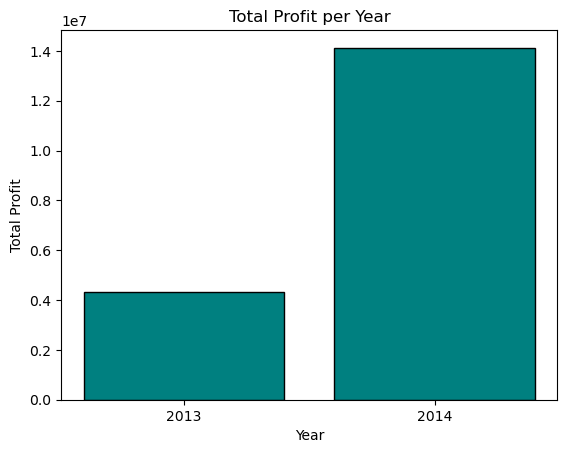

In [71]:
yearly_profit = df.groupby('Year')['Profit'].sum().reset_index()
years=['2013','2014']
plt.bar(years, yearly_profit['Profit'], color='teal', edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Total Profit")
plt.title("Total Profit per Year")
plt.show()


                     Unit Cost  Manufacturing Price  Sale Price  Gross Sales  \
Unit Cost             1.000000            -0.029644   -0.065066     0.327221   
Manufacturing Price  -0.029644             1.000000    0.070786     0.049852   
Sale Price           -0.065066             0.070786    1.000000     0.808250   
Gross Sales           0.327221             0.049852    0.808250     1.000000   
Discounts             0.266142             0.019768    0.664857     0.812285   
Sales                 0.326914             0.051549    0.805878     0.998174   
COGS                  0.331694             0.046857    0.799335     0.994519   
Profit                0.271969             0.065511    0.675229     0.830512   

                     Discounts     Sales      COGS    Profit  
Unit Cost             0.266142  0.326914  0.331694  0.271969  
Manufacturing Price   0.019768  0.051549  0.046857  0.065511  
Sale Price            0.664857  0.805878  0.799335  0.675229  
Gross Sales           0.812

<Axes: >

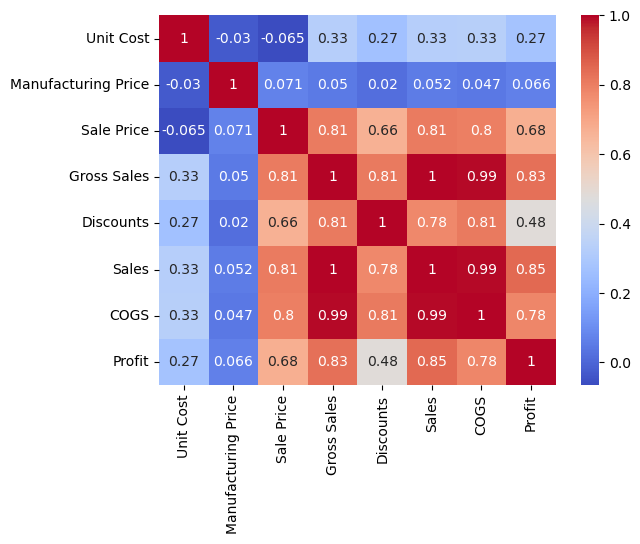

In [73]:
corr = df[['Unit Cost', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']].corr()
print(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [75]:
pivot = df.pivot_table(values='Profit', index='Country', columns='Segment', aggfunc='sum')
print(pivot)


Segment                   Channel Partners  Enterprise  Government  Midmarket  \
Country                                                                         
Canada                           358978.14   207468.75  2258471.52  132488.98   
France                           271581.36   155718.13  2709915.22  164542.08   
Germany                          247358.88   179518.75  2677175.94   85354.75   
Mexico                           170890.08   170721.25  2039159.38  150546.40   
United States of America         267994.68   226670.00  1703451.12  127170.88   

Segment                   Small Business  
Country                                   
Canada                          900799.0  
France                          730731.5  
Germany                         771973.0  
Mexico                          667606.0  
United States of America       1072059.0  
